# Calculus

studied continuous changes

### Turunan Symbolic

In [5]:
import sympy as sy

### Turunan Numerik

In [4]:
import numpy as np

misal ga punya data array, tapi fungsi matematika f(x = 2x^2 + 4x - 1)

In [3]:
# np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None) default

In [3]:
X = np.linspace(-100, 100) # range sumbu X
Y = 2*X**2+4*X-1

In [4]:
X

array([-100.        ,  -95.91836735,  -91.83673469,  -87.75510204,
        -83.67346939,  -79.59183673,  -75.51020408,  -71.42857143,
        -67.34693878,  -63.26530612,  -59.18367347,  -55.10204082,
        -51.02040816,  -46.93877551,  -42.85714286,  -38.7755102 ,
        -34.69387755,  -30.6122449 ,  -26.53061224,  -22.44897959,
        -18.36734694,  -14.28571429,  -10.20408163,   -6.12244898,
         -2.04081633,    2.04081633,    6.12244898,   10.20408163,
         14.28571429,   18.36734694,   22.44897959,   26.53061224,
         30.6122449 ,   34.69387755,   38.7755102 ,   42.85714286,
         46.93877551,   51.02040816,   55.10204082,   59.18367347,
         63.26530612,   67.34693878,   71.42857143,   75.51020408,
         79.59183673,   83.67346939,   87.75510204,   91.83673469,
         95.91836735,  100.        ])

In [5]:
X.shape

(50,)

In [6]:
Y

array([ 1.95990000e+04,  1.80159929e+04,  1.64996247e+04,  1.50498955e+04,
        1.36668051e+04,  1.23503536e+04,  1.11005410e+04,  9.91736735e+03,
        8.80083257e+03,  7.75093669e+03,  6.76767972e+03,  5.85106164e+03,
        5.00108247e+03,  4.21774219e+03,  3.50104082e+03,  2.85097834e+03,
        2.26755477e+03,  1.75077010e+03,  1.30062432e+03,  9.17117451e+02,
        6.00249479e+02,  3.50020408e+02,  1.66430237e+02,  4.94789671e+01,
       -8.33402749e-01,  1.54931279e+01,  9.84585589e+01,  2.48062890e+02,
        4.64306122e+02,  7.47188255e+02,  1.09670929e+03,  1.51286922e+03,
        1.99566805e+03,  2.54510579e+03,  3.16118242e+03,  3.84389796e+03,
        4.59325239e+03,  5.40924573e+03,  6.29187797e+03,  7.24114910e+03,
        8.25705914e+03,  9.33960808e+03,  1.04887959e+04,  1.17046227e+04,
        1.29870883e+04,  1.43361928e+04,  1.57519363e+04,  1.72343186e+04,
        1.87833399e+04,  2.03990000e+04])

In [3]:
import matplotlib.pyplot as plt

In [9]:
# ada 2 cara
df1 = np.diff(Y)/np.diff(X) # cara 1
df2 = np.gradient(Y,X)  # urutannya Y dulu baru X.  cara 2

In [10]:
df1.shape # indexnya berkurang 1

(49,)

In [11]:
df2.shape

(50,)

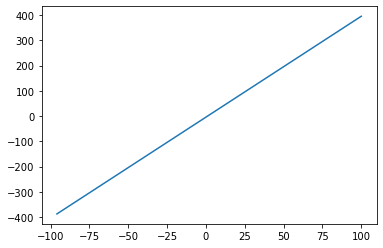

In [14]:
plt.plot(X[1:],df1)  # X dislice biar indeksnya sama

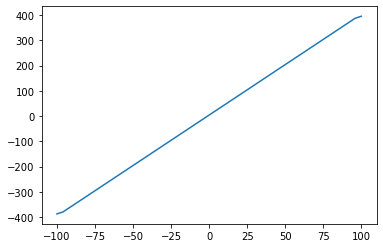

In [15]:
plt.plot(X, df2) #ga perlu slice X karena udah sama indexnya

ada bengkok di masing2 ujung, TIDAK APA-APA.

## Optimisasi

cari global minimum aja. ga ada syntax buat cari global max

In [1]:
from scipy.optimize import minimize_scalar

In [17]:
def f(x):
    return 2*x**2+4*x-1

opt = minimize_scalar(f)
opt

     fun: -3.0
    nfev: 9
     nit: 4
 success: True
       x: -1.0000000000000002

liat fun dan x saja. 

* fun = nilai y
* x = letak global min
* nit = jumlah iterasi
* success = True artinya berhasil, kalo False berarti ga ada global min atau gagal

In [18]:
opt.x

-1.0000000000000002

In [19]:
opt.fun

-3.0

contoh yang GA ada global minimum:

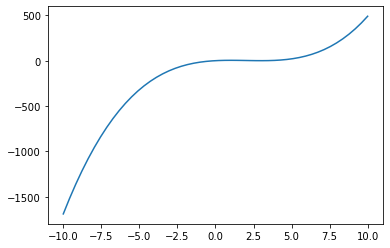

In [6]:
X1 = np.linspace(-10, 10)
Y1 = X1**3 -6*X1**2 + 9*X1 + 1

df4 = np.gradient(Y1,X1)
plt.plot(X1, Y1)

In [7]:
def f2(x):
    return x**3 - 6*x**2 + 9*x + 1

In [ ]:
minimize_scalar(f2)  # akan gagal karena ga punya global minimum
# error msg -> OUTPUT ERROR: (34, 'Numerical result out of range')

triknya flip saja!

In [9]:
def f3(x):
    return -(x**3 - 6*x**2 + 9*x + 1)

In [10]:
minimize_scalar(f3)

     fun: -5.0
    nfev: 13
     nit: 9
 success: True
       x: 0.99999998519

karena kita flip, berarti Y kita bukan -5 melainkan -(-5)

# Turunan Parsial

In [26]:
x, y, z = sy.symbols('x y z')
f = 4*x*y + x*sy.sin(z) + x**3 + z**8*y
f

x**3 + 4*x*y + x*sin(z) + y*z**8

In [27]:
x = sy.Symbol('x')
y = sy.Symbol('y')
z = sy.Symbol('z')

In [28]:
# turunan parsial thd x
sy.diff(f,x)

3*x**2 + 4*y + sin(z)

In [29]:
# turunan parsial thd y
sy.diff(f, y)

4*x + z**8

In [30]:
sy.diff(f, z)

x*cos(z) + 8*y*z**7

## Gradient

In [31]:
from sympy.tensor.array import derive_by_array
grad = derive_by_array(f, (x, y, z))
grad

[3*x**2 + 4*y + sin(z), 4*x + z**8, x*cos(z) + 8*y*z**7]

In [32]:
type(grad)

sympy.tensor.array.dense_ndim_array.ImmutableDenseNDimArray

tipenya bukan vektor ternyatah

## Jacobian

In [36]:
f_jacob = sy.Matrix([x*y+y, 2*x*y-2])
f_jacob

Matrix([
[  x*y + y],
[2*x*y - 2]])

In [37]:
type(f_jacob)

sympy.matrices.dense.MutableDenseMatrix

In [39]:
# cari Jacobiannya
par = sy.Matrix([x, y])
f_jacob.jacobian(par)

Matrix([
[  y, x + 1],
[2*y,   2*x]])

In [40]:
sy.Matrix(grad)

Matrix([
[3*x**2 + 4*y + sin(z)],
[           4*x + z**8],
[  x*cos(z) + 8*y*z**7]])

In [41]:
type(sy.Matrix(grad))

sympy.matrices.dense.MutableDenseMatrix

In [43]:
sy.Matrix(grad).jacobian(sy.Matrix([x,y,z]))

Matrix([
[   6*x,      4,                cos(z)],
[     4,      0,                8*z**7],
[cos(z), 8*z**7, -x*sin(z) + 56*y*z**6]])

## Hessian

In [44]:
f

x**3 + 4*x*y + x*sin(z) + y*z**8

In [45]:
sy.hessian(f,(x,y,z))

Matrix([
[   6*x,      4,                cos(z)],
[     4,      0,                8*z**7],
[cos(z), 8*z**7, -x*sin(z) + 56*y*z**6]])

## Turunan Parsial Numerik

In [46]:
import numpy as np

In [47]:
def f(x,y):
    return x**2*y + 2*x**3*y + y**4

In [48]:
x = np.linspace(1,10)
y = np.linspace(1,10)

z = np.array( [[f(i,j) for i in x] for j in y])

dx, dy = np.gradient(z)

In [49]:
z

array([[4.00000000e+00, 5.71793215e+00, 7.98252429e+00, ...,
        1.88137733e+03, 1.98916795e+03, 2.10100000e+03],
       [5.51405365e+00, 7.54752436e+00, 1.02280620e+01, ...,
        2.22771579e+03, 2.35530469e+03, 2.48767732e+03],
       [7.59758576e+00, 9.94659503e+00, 1.30430782e+01, ...,
        2.57462373e+03, 2.72201090e+03, 2.87492412e+03],
       ...,
       [8.63851183e+03, 8.65506008e+03, 8.67687411e+03, ...,
        2.67226363e+04, 2.77609459e+04, 2.88381853e+04],
       [9.31474995e+03, 9.33161373e+03, 9.35384371e+03, ...,
        2.77436988e+04, 2.88018068e+04, 2.98995867e+04],
       [1.00300000e+04, 1.00471793e+04, 1.00698252e+04, ...,
        2.88037733e+04, 2.98816795e+04, 3.10000000e+04]])

In [50]:
z.shape

(50, 50)

In [51]:
print(dx)
print(dx.shape)

[[   1.51405365    1.82959221    2.2455377  ...  346.33846043
   366.13673811  386.67731896]
 [   1.79879288    2.11433144    2.53027693 ...  346.62319966
   366.42147734  386.96205819]
 [   2.46311416    2.77865272    3.19459822 ...  347.28752094
   367.08579863  387.62637947]
 ...
 [ 657.45523618  657.77077474  658.18672024 ... 1002.27964296
  1022.07792064 1042.61850149]
 [ 695.74408466  696.05962322  696.47556871 ... 1040.56849144
  1060.36676912 1080.90734997]
 [ 715.25004974  715.5655883   715.98153379 ... 1060.07445652
  1079.8727342  1100.41331505]]
(50, 50)
